## Introductory section

For my project, I decided to look at crime data across two major cities: Chicago and London. The reason for this was for personal curiosity (as I have been to both cities) as well as the challenge of comparing crime rates with two datasets that were created completely independently of each other by two different governments. 

The london dataset was acquired from Kaggle (https://www.kaggle.com/jboysen/london-crime) and the Chicago dataset was acquired from data.world (https://data.world/publicsafety/chicago-crime). Both datasets were in the public domain and are free to use by anyone. 


The goal of the project is to gain some basic insights into how crime varies across the two cities, as well as to get some practice in cleaning and manipulating data.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

### Getting the data

The data is not initially in a useable format. The Chicago data is in the form of three files, one for 2014, one for 2015, and one for 2016. The London dataset also covers the years 2008 - 2016 in a single file, and we want to pare that down to 2014 - 2016 for the sake of easier comparisons between the two cities.


For comparing the two cities, we also need population data. This was trickier, but I was able to copy/paste the data from the internet. The London population data came from (https://data.london.gov.uk/dataset/london-borough-profiles) and the Chicago data came from (http://www.rtams.org/rtams/chicagoWards.jsp) . The year the data was collected was slightly off (Chicago is 2010, and London is 2017) but it is close enough for our purposes.

The top cell contains code to actually get the fully-cleaned data  The cells in the section <b> Cleaning Pipeline </b> show all of the steps it took to clean the data, and can be freely skipped over for demonstration purposes. The actual graphing/investigative portion begins in the section entitled <b> Extracting Insights </b>. 

Needless to say, cleaning the data is an incredibly important step, and should never be overlooked in any project.

## Importing the cleaned data

In [2]:
# getting the actual crime tables, already cleaned. Uncomment these lines out if wanted. 
# london_table = pd.read_csv("cleaned_data/london_crime_table_2014-2016.xlsx")
# chicago_table = pd.read_csv("cleaned_data/chicago_crime_table_2014-2016.xlsx")


# An alternate options for getting the the working samples instead of the full tables. 
# Comment or Uncomment to use.
london_table = pd.read_excel("cleaned_data/london_working_sample_2014-2016.xlsx")
chicago_table = pd.read_excel("cleaned_data/chicago_working_sample_2014-2016.xlsx")


# Getting the population tables for each city. 
chicago_population_table = pd.read_excel("cleaned_data/Population_workbook.xlsx", 
                                         sheet_name= "Sheet1")

london_population_table = pd.read_excel("cleaned_data/Population_workbook.xlsx", 
                                        sheet_name= "Sheet2")


# Converting string to datetime. More on this later.
chicago_table["Date"] = pd.to_datetime(chicago_table["Date"])

# Scrambles the rows, just to be on the safe side.
chicago_table = chicago_table.sample(frac= 1)
london_table = london_table.sample(frac = 1)

# Printing the collective populations, as a sanity check. Should match the numbers from Wikipedia.
print(np.sum(chicago_population_table["2010_Population"]))
print(np.sum(london_population_table["Population"]))

2693441
8835400


# Cleaning Pipeline

### Getting the data.

In [3]:
# Getting the population tables
chicago_population_table = pd.read_excel("original_data/Population_workbook.xlsx", sheet_name= "Sheet1")
london_population_table = pd.read_excel("original_data/Population_workbook.xlsx", sheet_name= "Sheet2")

chicago_population_table["2010 Population"] = chicago_population_table["2010 Population"].replace(",", "").apply(np.int)


In [4]:
# Getting the actual crime tables. 
london_table = pd.read_csv("original_data/london_crime_by_lsoa.csv")

chicago_2014_table = pd.read_csv("original_data/chicago_crime_2014.csv")
chicago_2015_table = pd.read_csv("original_data/chicago_crime_2015.csv")
chicago_2016_table = pd.read_csv("original_data/chicago_crime_2016.csv")

# Adding the year for each table as a new column
chicago_2014_table["Year"] = 2014
chicago_2015_table["Year"] = 2015
chicago_2016_table["Year"] = 2016

# filtering the london table to get only the years 2014, 2015, and 2016. 
london_table = london_table[np.logical_and(london_table["year"] <= 2016, london_table["year"] >= 2014)]

# joining all the chicago tables together into a single table.
chicago_table = pd.concat([chicago_2014_table, chicago_2015_table, chicago_2016_table])
chicago_table.reset_index()

# Getting rid of the subtables we no longer need. 
del chicago_2014_table,  chicago_2015_table, chicago_2016_table

### Changing the column names. 

For the sake of consistency, we have decided to capitalize all column names and substitute all whitespace with underscores for every table.

In [5]:
# Managing the column names, all four tables. 
new_columns_list = [col.title().replace(" ", "_") for col in london_table.columns]
london_table.columns = new_columns_list
    
new_columns_list = [col.title().replace(" ", "_") for col in chicago_table.columns]
chicago_table.columns = new_columns_list

new_columns_list = [col.title().replace(" ", "_") for col in london_population_table.columns]
london_population_table.columns = new_columns_list

new_columns_list = [col.title().replace(" ", "_") for col in chicago_population_table.columns]
chicago_population_table.columns = new_columns_list


del new_columns_list # No longer needed.

### Exploratory

Now, we go through both the chicago and london tables looking for missing values and getting descirptive statistics. This is always a good practice, even if you belieive the data is clean and reliable, as it lets you get a feel for the data.

In [6]:
print(london_table.isna().sum())
print("---------")
london_table.describe()

Lsoa_Code         0
Borough           0
Major_Category    0
Minor_Category    0
Value             0
Year              0
Month             0
dtype: int64
---------


,Value,Year,Month
count,4.496868e+06,4.496868e+06,4.496868e+06
mean,4.732022e-01,2.015000e+03,6.500000e+00
std,1.590697e+00,8.164967e-01,3.452053e+00
min,0.000000e+00,2.014000e+03,1.000000e+00
25%,0.000000e+00,2.014000e+03,3.750000e+00
50%,0.000000e+00,2.015000e+03,6.500000e+00
75%,1.000000e+00,2.016000e+03,9.250000e+00
max,2.000000e+02,2.016000e+03,1.200000e+01


In [7]:
print(chicago_table.isna().sum())
print("---------")
chicago_table.describe()

Id                          0
Case_Number                 0
Date                        0
Block                       0
Iucr                        0
Primary_Type                0
Description                 0
Location_Description     1018
Arrest                      0
Domestic                    0
Beat                        0
District                    0
Ward                        4
Community_Area              1
Fbi_Code                    0
Latitude                18881
Longitude               18881
Year                        0
dtype: int64
---------


,Id,Beat,District,Ward,Community_Area,Latitude,Longitude,Year
count,7.545410e+05,754541.000000,754541.000000,754537.000000,754540.000000,735660.000000,735660.000000,754541.000000
mean,1.007729e+07,1143.947323,11.210401,22.848897,37.404376,41.841643,-87.672377,2014.924281
std,5.825633e+05,689.856629,6.891652,13.809530,21.378246,0.094159,0.066874,0.803703
min,2.121200e+04,111.000000,1.000000,1.000000,0.000000,36.619446,-91.686566,2014.000000
25%,9.769778e+06,612.000000,6.000000,10.000000,23.000000,41.767903,-87.715579,2014.000000
50%,1.009958e+07,1024.000000,10.000000,23.000000,32.000000,41.858595,-87.666147,2015.000000
75%,1.041973e+07,1654.000000,16.000000,34.000000,56.000000,41.904433,-87.628109,2016.000000
max,1.073638e+07,2535.000000,31.000000,50.000000,77.000000,42.022671,-87.524529,2016.000000


Lat and longitude seem weird. Some of the values are well outside of chicago. To isolate them, we will get a better
sense of the range of those values and then look manually for what some better replacement values might be.

In [8]:
# Looking at the unique lat and long
uniqe_lats = chicago_table.sort_values(["Latitude"], ascending= True)["Latitude"].unique()
uniqe_longs = chicago_table.sort_values(["Longitude"], ascending= True)["Longitude"].unique()
print(uniqe_lats)
print(uniqe_longs)

[36.61944639 41.64458971 41.6446041  ... 42.02257505 42.02267125
         nan]
[-91.68656568 -87.9343243  -87.92890944 ... -87.52452947 -87.52452938
          nan]


Here we actually fill in the nan values and generally clean the data.

In [9]:
# 999 as a sentinal value. Indicates that the data is missing, but still allows for some operations. 
# We just have to exclude all values with 999 to get accuracte results.

chicago_table["Latitude"].fillna(999, inplace = True)
chicago_table["Longitude"].fillna(999, inplace = True)

# Changing our more extreme lat/long values to something more sensible. 
chicago_table.loc[chicago_table["Latitude"] < 37, "Latitude" ] = 41.64458971 
chicago_table.loc[chicago_table["Longitude"] < -90, "Longitude" ] = -87.9343243

# Fill na for location description.
chicago_table["Location_Description"].fillna("Location not specified", inplace = True)

# dropping columns where Ward or Community area is missing. Should only be about 4-5 rows, so an acceptable loss.
chicago_table = chicago_table[chicago_table["Ward"].isnull() == False]
chicago_table = chicago_table[chicago_table["Community_Area"].isnull() == False]
              
# Then we also change ward to ints, just to be on the safe side.     
chicago_table["Ward"] = chicago_table["Ward"].apply(np.int)

### Datetime

A good thing to do is to convert the chicago table's Date column to a Datetime object. This is a very handy, as these objects have all sorts of convenience features that make working with timeseries data much easier. We might not use it very much, but it is stil a good habit to get into.  

In [10]:
chicago_table["Date"] = pd.to_datetime(chicago_table["Date"])

### Final Touches

Now we are going to save all our cleaned files into the cleaned_data directory. We also going to create working samples of both our chicago and london tables. Just eyeballing it, the chicago table takes about 180 bytes per row and the london table takes about 68 bytes per row, so this gives us an idea of how many rows we should sample to stay under 10 megabytes.

In [14]:
# Fixing our random seed, for reproducibility.
np.random.seed(19)

london_working_sample = london_table.sample(70000 )
chicago_working_sample = chicago_table.sample(25000)

# writing london to disk
london_table.to_csv("cleaned_data/london_crime_table_2014-2016.csv", index = False)
with pd.ExcelWriter("cleaned_data/london_working_sample_2014-2016.xlsx", engine='xlsxwriter') as writer:  
    london_working_sample.to_excel(writer, index= False)
    
# writing Chicago to disk. 
chicago_table.to_csv("cleaned_data/chicago_crime_table_2014-2016.csv", index = False)
with pd.ExcelWriter("cleaned_data/chicago_working_sample_2014-2016.xlsx", engine='xlsxwriter') as writer:  
    chicago_working_sample.to_excel(writer, index= False)
    
    

# And then writing the population tables to disk.
with pd.ExcelWriter("cleaned_data/Population_workbook.xlsx", engine='xlsxwriter') as writer: 
    
    # Write each dataframe to a different worksheet.
    chicago_population_table.to_excel(writer, sheet_name='Sheet1', index= False)
    london_population_table.to_excel(writer, sheet_name='Sheet2', index = False)
    
chicago_table.reset_index(inplace= True)
london_table.reset_index(inplace = True)


# Extracting Insights

Now that the data is cleaned, we can start getting some insights. 

A big hurdle is that while the datasets are broadly comparable, the UK and US have completely different legal systems 
and reporting systems for crime. Thus, not all the columns are the same. Chicago's crimes are coded based on the Illinois Uniform Crime Reporting codes (IUCR, more information here http://directives.chicagopolice.org/forms/CPD-63.451_Table.pdf) wheras the London data is based on the London Metropolitan Police (more information here: https://www.met.police.uk/sd/stats-and-data/). This poses a bit of a problem for direct comparisons.

The main points of comparison are between Chicago's wards (50 in total) versus London's boroughs (33 in total), which can give us some information on how crime differs by district/neighborhood. Crimes are reported in Chicago based on the columns <b> "Primary_Type" </b> and <b> "Discription" </b> whereas in London the most relevant columns are <b> "Major_Category" </b> and <b> "Minor_Category" </b>. In Chiago, a simple bicycle theft would be recored as <b> "Theft"/""$500 AND UNDER" </b>   whereas in London it would be recorded as <b>"Theft and Handling	Theft"/"Taking of Pedal Cycle" </b> 

Needless to say, this makes comparing exact crimes very difficult, if not impossible. We can still look at broad categories, though, and that is good enough for our purposes.

First, we will go through every column and look at a histogram of values. For speed, we will only look at the first 20,000 records of each one. This is generally a good practice to get a feel for the data.

Chicago -------------------- 

index


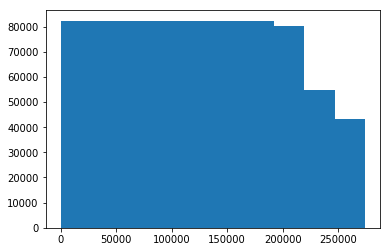



Id


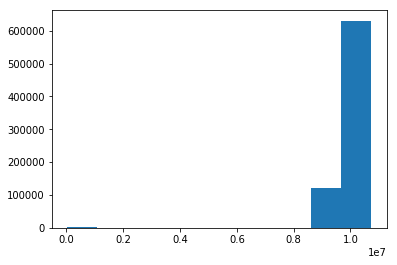



Case_Number
could not display Case_Number


Date


C:\Users\Jack\AppData\Local\Continuum\anaconda3\envs\tf_clone\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


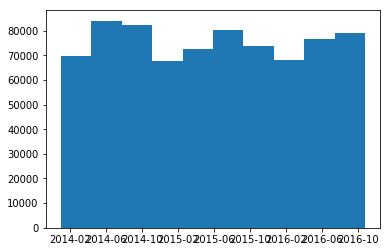



Block
could not display Block


Iucr
could not display Iucr


Primary_Type
could not display Primary_Type


Description
could not display Description


Location_Description
could not display Location_Description


Arrest


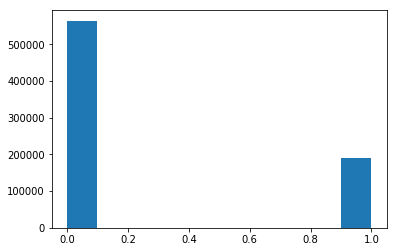



Domestic


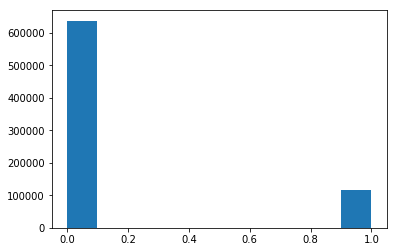



Beat


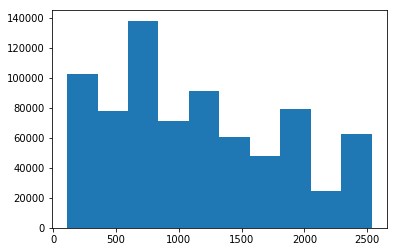



District


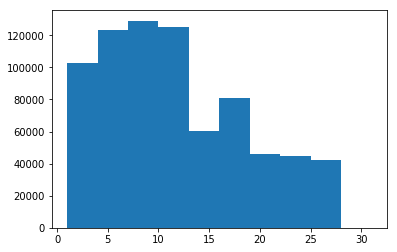



Ward


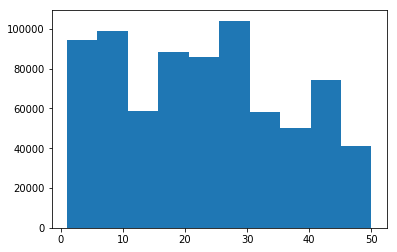



Community_Area


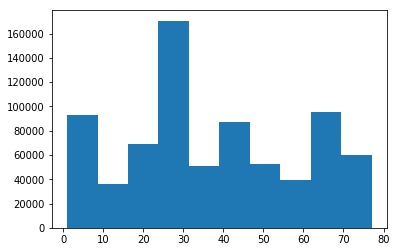



Fbi_Code
could not display Fbi_Code


Latitude


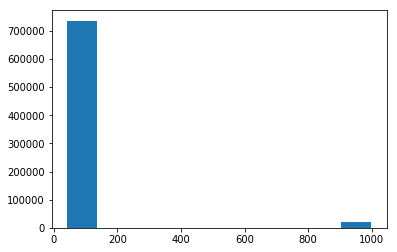



Longitude


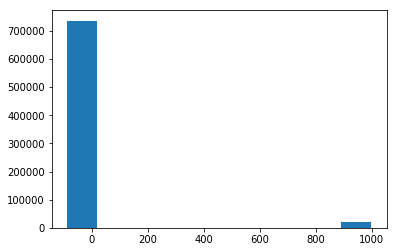



Year


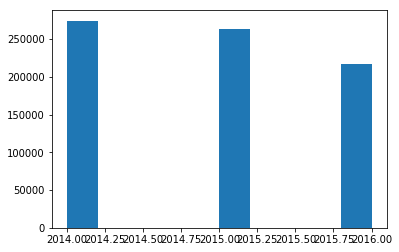



London -------------------- 

index


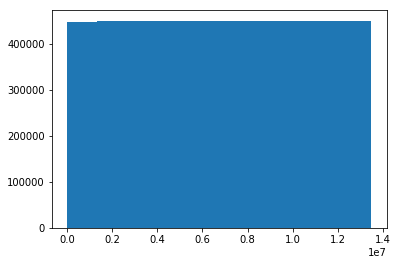



Lsoa_Code
could not display Lsoa_Code


Borough
could not display Borough


Major_Category
could not display Major_Category


Minor_Category
could not display Minor_Category


Value


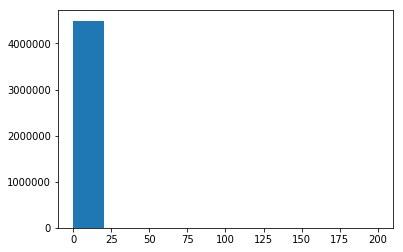



Year


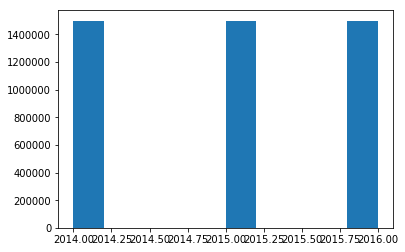



Month


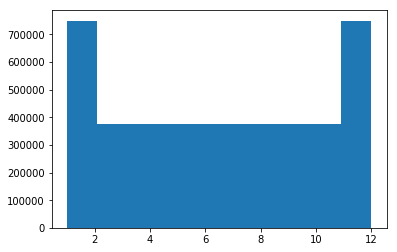

In [15]:
print("Chicago -------------------- \n")       
for column in chicago_table.columns:
    try: 
        print(column)
        assert chicago_table[column].dtype != "object"
        plt.hist(chicago_table[column])
        plt.show()
        print("\n")
    except: 
        print("could not display {}".format(column))
        print("\n")
        
print("London -------------------- \n")       
for column in london_table.columns:
    try: 
        print(column)
        assert london_table[column].dtype != "object"
        plt.hist(london_table[column])
        plt.show()
        print("\n")
    except: 
        print("could not display {}".format(column))
        print("\n")

Overall, it looks like there is only a little weirdness. In Chicago, the average crime does not result in an arrest, most crimes are not domestic, and crimes seem to be mostly randomly distributed across all 50 wards (although, we haven't corrected for population yet...)



In London, the only weird point the month distribution, but this seems to a result of rounding errors, as calling .value_counts() on the relevant column shows that months are evenly distributed.

Next, we will look at how the crime categories are distributed for both London and Chicago. 

In [8]:
print("Chicago \n")
print(chicago_table["Primary_Type"].value_counts(normalize=True))
print("-------------")
print("London \n")

# The London table is a condition/count format. So we have to be a little creative to get the normalized counts.
print(london_table.groupby("Major_Category").sum()["Value"]/np.sum(london_table["Value"]))

Chicago 

THEFT                                0.223187
BATTERY                              0.185925
CRIMINAL DAMAGE                      0.108724
NARCOTICS                            0.083751
ASSAULT                              0.065693
OTHER OFFENSE                        0.064222
DECEPTIVE PRACTICE                   0.058482
BURGLARY                             0.051675
MOTOR VEHICLE THEFT                  0.038459
ROBBERY                              0.038282
CRIMINAL TRESPASS                    0.025418
WEAPONS VIOLATION                    0.012328
PUBLIC PEACE VIOLATION               0.008848
OFFENSE INVOLVING CHILDREN           0.008563
CRIM SEXUAL ASSAULT                  0.005083
PROSTITUTION                         0.004853
INTERFERENCE WITH PUBLIC OFFICER     0.004608
SEX OFFENSE                          0.003528
HOMICIDE                             0.002009
ARSON                                0.001702
LIQUOR LAW VIOLATION                 0.001177
GAMBLING                

They look reasonably similar. Thefts/burglaries are 25- 50% of all crimes, with 5.5 -9% of crimes involving drugs. The hardest categories to compare are violence (because of all the subcategories ), but it looks like it is between 23-25% of all crimes.

Just for fun, lets see the distribution of arrests vs. Domestic for the chicago dataset. We'll visualize it with the seaborn library. 


[Text(0,0,'Neither'),
 Text(0,0,'Domestic Only'),
 Text(0,0,'Arrest Only'),
 Text(0,0,'Both')]

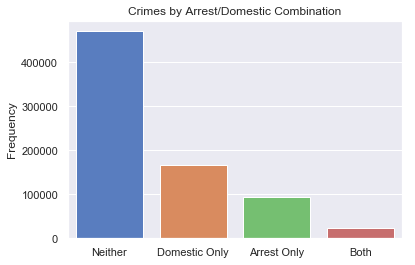

In [16]:
domest_arrest = chicago_table.groupby(["Domestic", "Arrest"]).count()

sb.set(palette= "muted")
ax = sb.barplot(x = domest_arrest.index, y = "Id", data = domest_arrest)

ax.set(ylabel= "Frequency", title = "Crimes by Arrest/Domestic Combination")
ax.set_xticklabels(['Neither', 'Domestic Only', 'Arrest Only', "Both"])

The majority of crimes seem to be neither domestic nor involve arrests. Let's look at the arrest percentage depending on whether the crime was domestic or not.

In [17]:
neither = chicago_table.loc[0, "Id"]
arrest_only = chicago_table.loc[1, "Id"]
domestic_only = chicago_table.loc[2, "Id"]
both = chicago_table.loc[3, "Id"]

print("percent chance of arrest when the crime is domestic: {}%".format(
    both/(both + domestic_only) * 100))
print("percent chance of arrest when the crime is NOT domestic: {}".format(
    arrest_only/(neither + arrest_only) * 100))

del neither, arrest_only, domestic_only, both  # No longer needed, 


percent chance of arrest when the crime is domestic: 50.00000529282054%
percent chance of arrest when the crime is NOT domestic: 49.99979887339461


Incredible. Whether the crime was domestic or not makes literally no difference. I would not have expected this. 

Next, let's look at the distribution of crimes by ward/borough

Text(365.364,0.5,'Number of Crimes per Thousand People')

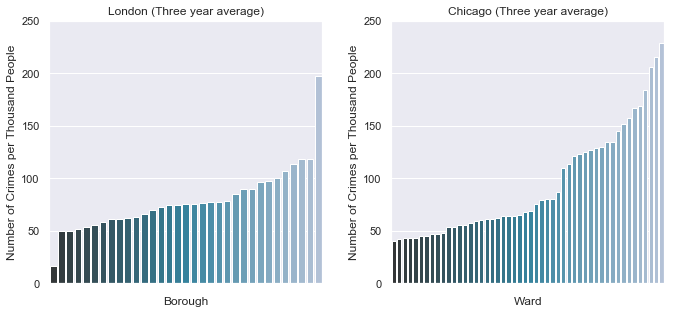

In [18]:
dist_chicago = chicago_table.groupby("Ward").count()
dist_london = london_table.groupby("Borough").sum()

# we have to sort for the division (crimes/Ward_and_or_Borough_population) to work.
chicago_table.sort_values("Ward", ascending= True, inplace= True)
chicago_population_table.sort_values("Ward", ascending= True, inplace= True)

london_table.sort_values("Borough", ascending = True, inplace= True)
london_population_table.sort_values("Name", ascending= True, inplace= True)


# Reseting the index, as otherwise there will be problems when we try to divide by the corresponding
# Ward/Borough. Tedious, but it works. 
dist_london.reset_index(level=0, inplace=True)
dist_chicago.reset_index(level=0, inplace=True)
chicago_population_table.reset_index(level= 0, inplace= True, drop= True)
london_population_table.reset_index(level=0, inplace=True, drop= True)


# For Chicago, we use ID, as each row represent one crime, so with count() the choice of column is arbitrary.
# We are dividing by three now to get the average for all three years
dist_london["Value"] = dist_london["Value"]/3
dist_chicago["Id"] = dist_chicago["Id"]/3


#  We divide and also multiply by 1000 to get the crimes per 1,000 for all three years averaged.
dist_london["Value"] = (dist_london["Value"]/london_population_table["Population"])     * 1000 
dist_chicago["Id"] = (dist_chicago["Id"]/chicago_population_table["2010_Population"])      * 1000  

# Have to sort again so that the graph will show crimes per area in ascending order.
dist_london.sort_values("Value", ascending = True, inplace= True)
dist_chicago.sort_values("Id", ascending = True, inplace= True )


# Graphing, two barplots in ascending order
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.tight_layout(pad = 3.0)

# Plotting london
first_ax = sb.barplot(x = "Borough", y= "Value", data = dist_london, ax = ax[0], palette= "PuBuGn_d")
first_ax.set_ybound(0, 250)
first_ax.set_title("London (Three year average)")
first_ax.set_xticklabels("")
first_ax.set_ylabel("Number of Crimes per Thousand People")


# plotting Chicago
second_ax = sb.barplot(x = "Ward", y= "Id", data = dist_chicago, ax = ax[1], palette= "PuBuGn_d", 
                       order= dist_chicago["Ward"] )
second_ax.set_ybound(0, 250)
second_ax.set_title("Chicago (Three year average)")
second_ax.set_xticklabels("")
second_ax.set_ylabel("Number of Crimes per Thousand People")

Looking at the distribution of crimes, it looks like Chicago is generally more crime-filled than London. The most crime filled borough of London is Westminster, and I'm guessing that's because you would see a lot of low-level crimes related to the tourist industry (pickpockets, scams, drinking, traffic and moving violations, etc.). The lowest crime area Borough is London, which is probably because it is so small (about one square mile) and filled with wealthy international businesses.

Chicago by contrast, doesn't seem to have any outliers, but is just generally higher overall. London only has 5 boroughs with crimes over 100 while Chicago has about 20 wards above that level. 

Next, let's compare London and Chicago on three major crime categories: drug crimes, thefts, and murders, all adjusted by poulation.

In [20]:
# some variables that will prove useful... 
LONDON_POPULATION = np.sum(london_population_table["Population"])
CHICAGO_POPULATION = np.sum(chicago_population_table["2010_Population"])

# Also for doing the crimes rates for Chicago, 

Text(0.5,1,'Drug Crimes per Year per Million')

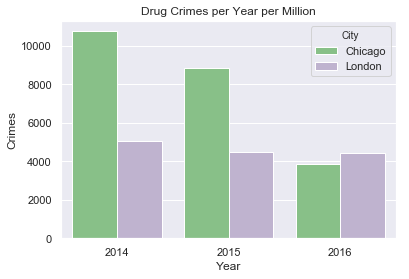

In [21]:
# NARCOTICS/Drugs

drug_chicago = chicago_table[chicago_table["Primary_Type"] == "NARCOTICS"]
drug_london = london_table[london_table["Major_Category"] == "Drugs"]

drug_chicago = drug_chicago.groupby("Year").count()
drug_london = drug_london.groupby("Year").sum()

drug_chicago["Year"] = drug_chicago.index
drug_london["Year"] = drug_london.index

drug_chicago["Id"] = (drug_chicago["Id"]/CHICAGO_POPULATION)   * 1000000 
drug_london["Value"] = (drug_london["Value"]/LONDON_POPULATION) * 1000000
drug_chicago["City"] = "Chicago"
drug_london["City"] = "London"

plotting_df = pd.DataFrame()
plotting_df["Year"] = pd.concat([drug_chicago["Year"], drug_london["Year"]], axis = 0)
plotting_df["City"] = pd.concat([drug_chicago["City"], drug_london["City"]], axis = 0)
plotting_df["Crimes"] = pd.concat([drug_chicago["Id"], drug_london["Value"]], axis = 0)
plotting_df.reset_index(inplace= True, drop= True)


sb.set(palette= "Accent")
ax = sb.barplot(x = "Year", y= "Crimes", hue = "City",  data = plotting_df)
ax.set_title("Drug Crimes per Year per Million")
# sb.barplot(x = "Year", y = "Id", data = drug_chicago)

Chicago overall seems to have more drugs than London, although there was a big drop-off in 2016.

Text(0.5,1,'Thefts Per Year Per Million')

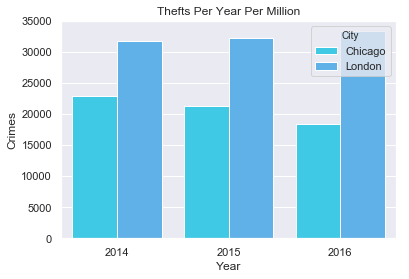

In [22]:
# Thefts
theft_chicago = chicago_table[chicago_table["Primary_Type"] == "THEFT"]
theft_london = london_table[london_table["Major_Category"] == "Theft and Handling"]

theft_chicago = theft_chicago.groupby("Year").count()
theft_london = theft_london.groupby("Year").sum()

theft_chicago["Year"] = theft_chicago.index
theft_london["Year"] = theft_london.index

theft_chicago["Id"] = (theft_chicago["Id"]/CHICAGO_POPULATION)   * 1000000 
theft_london["Value"] = (theft_london["Value"]/LONDON_POPULATION) * 1000000
theft_chicago["City"] = "Chicago"
theft_london["City"] = "London"

plotting_df = pd.DataFrame()
plotting_df["Year"] = pd.concat([theft_chicago["Year"], theft_london["Year"]], axis = 0)
plotting_df["City"] = pd.concat([theft_chicago["City"], theft_london["City"]], axis = 0)
plotting_df["Crimes"] = pd.concat([theft_chicago["Id"], theft_london["Value"]], axis = 0)
plotting_df.reset_index(inplace= True, drop= True)


sb.set(palette= "cool")
ax = sb.barplot(x = "Year", y= "Crimes", hue = "City",  data = plotting_df)
ax.set_title("Thefts Per Year Per Million")

London has more thefts than Chicago, which I did not expect. The most likely explanation is that London sees far more international tourists every year than Chicago, and tourists are far more likely to be pickpocketed than the average person.

Text(0.5,1,'Homicides Per Year Per Million')

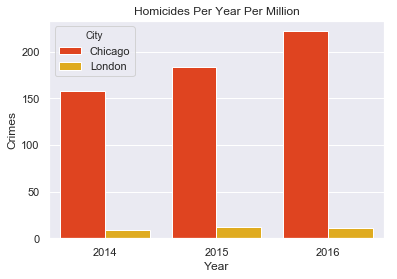

In [23]:
# Homicide
murder_chicago = chicago_table[chicago_table["Primary_Type"] == "HOMICIDE"]
murder_london = london_table[np.logical_and(london_table["Major_Category"] == "Violence Against the Person", 
                                          london_table["Minor_Category"] == "Murder")]

murder_chicago = murder_chicago.groupby("Year").count()
murder_london = murder_london.groupby("Year").sum()

murder_chicago["Year"] = murder_chicago.index
murder_london["Year"] = murder_london.index

murder_chicago["Id"] = (murder_chicago["Id"]/CHICAGO_POPULATION)   * 1000000 
murder_london["Value"] = (murder_london["Value"]/LONDON_POPULATION) * 1000000
murder_chicago["City"] = "Chicago"
murder_london["City"] = "London"

plotting_df = pd.DataFrame()
plotting_df["Year"] = pd.concat([murder_chicago["Year"], murder_london["Year"]], axis = 0)
plotting_df["City"] = pd.concat([murder_chicago["City"], murder_london["City"]], axis = 0)
plotting_df["Crimes"] = pd.concat([murder_chicago["Id"], murder_london["Value"]], axis = 0)
plotting_df.reset_index(inplace= True, drop= True)


sb.set(palette= "jet_r")
ax = sb.barplot(x = "Year", y= "Crimes", hue = "City",  data = plotting_df)
ax.set_title("Homicides Per Year Per Million")
# sb.barplot(x = "Year", y = "Id", data = drug_chicago)

Chicago has more than 10x the murder rate of london, with the problem growing worse in 2015 and 2016. For all the hysteria over how London is "stab city" Chicago is actually a far more dangerous place to live

One other aspect of this is that homicides in Chicago typical follow a seasonal pattern, spiking in the Summer along with increases in gang violence (which is the major driver of homicides). Let's see if there is a similar seasonal pattern in London. 

Also, this is a great example of why DateTime is so useful, as it makes looking at seasonal trends very easy.

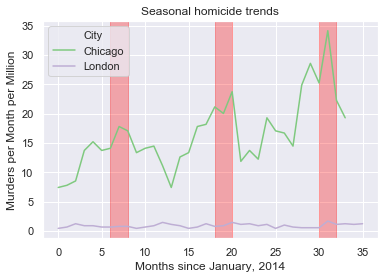

In [16]:
# Homicide, seasonal

murder_chicago = chicago_table[chicago_table["Primary_Type"] == "HOMICIDE"]
murder_london = london_table[np.logical_and(london_table["Major_Category"] == "Violence Against the Person", 
                                          london_table["Minor_Category"] == "Murder")]


# For this one, we extract year and month from the DateTime objects stored in the Date column. 
murder_chicago = murder_chicago.groupby([chicago_table['Date'].dt.year, 
                                       chicago_table['Date'].dt.month]).count()
murder_london = murder_london.groupby(["Year", "Month"]).sum()

murder_chicago.reset_index(inplace= True, drop= True)
murder_london.reset_index(inplace = True, drop = True)

murder_chicago["Time"] = murder_chicago.index
murder_london["Time"] = murder_london.index

murder_chicago["Id"] = (murder_chicago["Id"]/CHICAGO_POPULATION)   * 1000000         
murder_london["Value"] = (murder_london["Value"]/LONDON_POPULATION) * 1000000
murder_chicago["City"] = "Chicago"
murder_london["City"] = "London"

special_df = pd.DataFrame()
special_df["Time"] = pd.concat([murder_chicago["Time"], murder_london["Time"]], axis = 0)
special_df["City"] = pd.concat([murder_chicago["City"], murder_london["City"]], axis = 0)
special_df["Crimes"] = pd.concat([murder_chicago["Id"], murder_london["Value"]], axis = 0)
special_df.reset_index(inplace= True, drop= True)


sb.set(palette= "Accent")
ax = sb.lineplot(x = "Time", y= "Crimes", hue = "City",  data = special_df)
ax.set_title("Seasonal homicide trends")
ax.set_xlabel("Months since January, 2014")
ax.set_ylabel("Murders per Month per Million")
ax.axvspan(6, 8, alpha=0.3, color='red')
ax.axvspan(18, 20, alpha=0.3, color='red')
ax.axvspan(30, 32, alpha=0.3, color='red')

Just eyeballing it, there is no seasonal pattern for London, but for Chicago, we can see some spikes during June, July, and August (indicated in red). It would be interesting to compare the spikes with meterological data from those years to see if there is a homicide/heat correlation, but we do not have that data.

# Conclusion


Exploring the dataset has been great, and we have only scratched the surface in terms of global crime trends and sociological facors that contribute to crime. 

One interesting follow-up might be to look at rates of sexual harassment/assault, as these crimes are notoriously under-reported. If non-sex crimes in an area are very high, but sex-crimes are very low, that may be statistical evidence of under-reporting, and we might try to extrapolate the actual sex-assault rate. Another follow-up possibility would be integrating these crime datasets with other city datasets to look for interesting trends (such as tourism, wealth/income, pollution, etc.).